In [70]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [71]:
breast_cancer = load_breast_cancer()

In [72]:
dir(breast_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [73]:
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [74]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [75]:
df.shape

(569, 30)

## Obtaining feature matrix 

In [76]:
X = df.values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [77]:
X.shape

(569, 30)

2d numpy array

## Feature Scaling 

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
X_scaled = scaler.fit_transform(X) #calculates mean and standard deviation of variables in the dataset

## Choose the right number of dimensions (k)

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca = PCA(n_components = 30, random_state = 2020)

In [83]:
X_pca_transform = pca.fit_transform(X_scaled)

In [84]:
print('Variance by all 30 principal components =', sum(pca.explained_variance_ratio_*100))

Variance by all 30 principal components = 100.0


In [85]:
explained_variance = pca.explained_variance_ratio_ 

In [86]:
#returns percentage of varaince explained by each of the selected components
explained_variance*100

array([4.42720256e+01, 1.89711820e+01, 9.39316326e+00, 6.60213492e+00,
       5.49576849e+00, 4.02452204e+00, 2.25073371e+00, 1.58872380e+00,
       1.38964937e+00, 1.16897819e+00, 9.79718988e-01, 8.70537901e-01,
       8.04524987e-01, 5.23365745e-01, 3.13783217e-01, 2.66209337e-01,
       1.97996793e-01, 1.75395945e-01, 1.64925306e-01, 1.03864675e-01,
       9.99096464e-02, 9.14646751e-02, 8.11361259e-02, 6.01833567e-02,
       5.16042379e-02, 2.72587995e-02, 2.30015463e-02, 5.29779290e-03,
       2.49601032e-03, 4.43482743e-04])

The above values are arranged in descending 

In [87]:
sum(explained_variance*100)

100.0

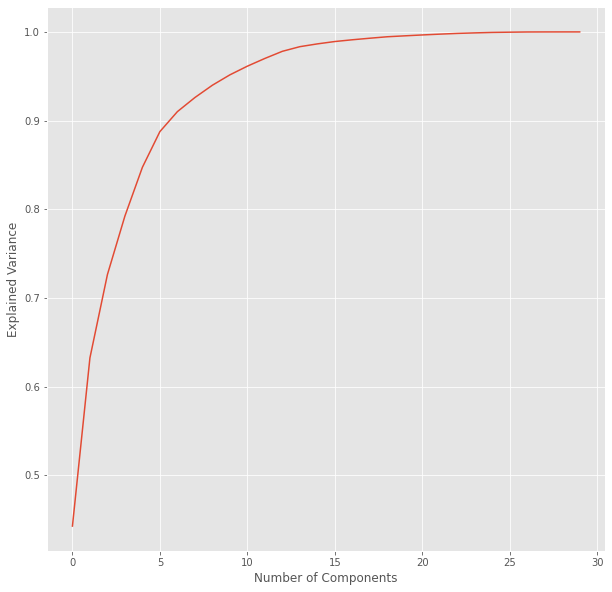

In [88]:
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

In [50]:
print("Variance explained by the first principal component = ", np.cumsum(explained_variance*100)[0])
print("Variance explained by the first 2 principal components = ", np.cumsum(explained_variance*100)[1])
print("Variance explained by the first 10 principal components = ", np.cumsum(explained_variance*100)[9])
print("Variance explained by the first 15 principal component = ", np.cumsum(explained_variance*100)[14])

Variance explained by the first principal component =  44.27202560752635
Variance explained by the first 2 principal components =  63.24320765155943
Variance explained by the first 10 principal components =  95.15688143366667
Variance explained by the first 15 principal component =  98.64881227145469


## Plotting 

## 2D

In [53]:
pca2 = PCA(n_components=2, random_state=2022)
X_pca2 = pca2.fit_transform(X_scaled)

<AxesSubplot:>

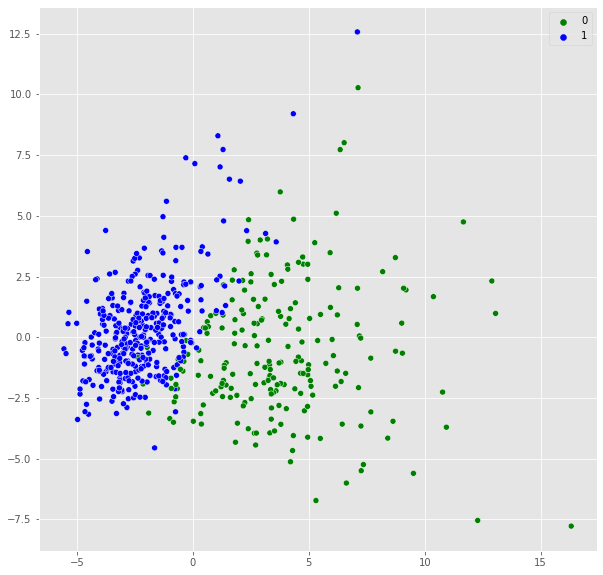

In [62]:
plt.rcParams['figure.figsize'] = (10,10)
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:, 1], hue=breast_cancer.target, palette=['green', 'blue'])

## 3D

In [63]:
from mpl_toolkits import mplot3d

In [64]:
pca3 = PCA(n_components=3, random_state = 2022)

In [65]:
X_pca3 = pca3.fit_transform(X_scaled)

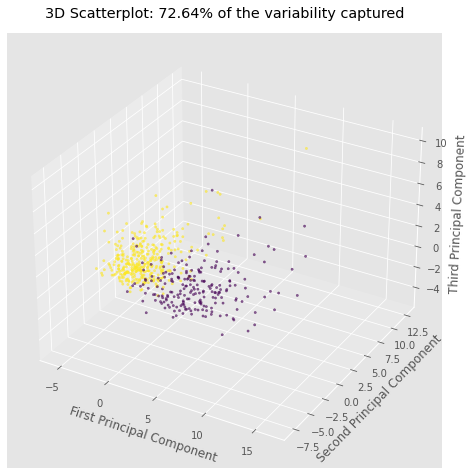

In [69]:
plt.rcParams['figure.figsize'] = (12,8)
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca3[:,0],X_pca3[:,1],X_pca3[:,2], c = breast_cancer.target, s=5, alpha = 0.6)
plt.title('3D Scatterplot: 72.64% of the variability captured', pad=15)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.savefig("3D_scatterplot.png")

## PCA 
* n_components = .95

In [89]:
pca_95 = PCA(n_components=0.95)

In [90]:
X_pca_95 = pca_95.fit_transform(X_scaled)

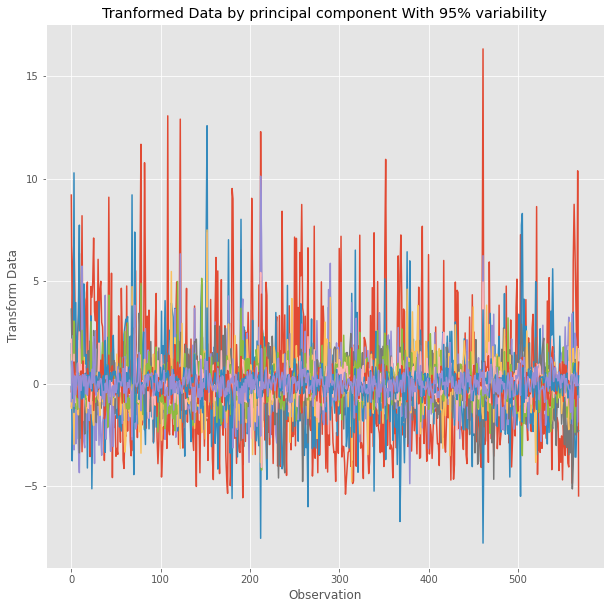

In [93]:
plt.plot(X_pca_95)
plt.title('Tranformed Data by principal component With 95% variability')
plt.xlabel('Observation')
plt.ylabel('Transform Data')
plt.show()

In [94]:
new_df = pd.DataFrame(X_pca_95, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
new_df['target'] = breast_cancer.target
new_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0
...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,0
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,0


In [96]:
new_df.to_csv('cancer.csv', index=False)

In [99]:
new_df.to_excel('cancer.xlsx', index=False)

In [98]:
pip install openpyxl

     |████████████████████████████████| 242 kB 227 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
